# Image Formation Module

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

In [30]:
## Packages we'll need for our exercises below
import numpy as np
from math import sqrt, sin, cos
import matplotlib.pyplot as plt

Using the camera obscura (pinhole camera) as a simple example, we learned that we can mathematically determine where something will show up in a picture relative to the real world position with $x = \begin{pmatrix}-fX \\ Z \end{pmatrix}$ where:

```
x = Projected image location in the camera sensor coordinate system

X = Actual object location in real world coordinate system

Z = Distance between the camera's aperture and actual object in real world coordinate system

f = Focal length (distance between photosensative material and aperture
```

## Exercise #1 - Perspective Projection
Understanding the loss of information in projecting down a dimension - in this case we're projecting from a 2D "real world" to a 1D sensor coordinate system

> Write code that simulates the projection of a line segment defined by two points (-5, Z) an (5, Z) where Z ranges from 10 to 1000, assumig a camera focal length of f=1.

> For each distance Z, project the two points into a 1-D sensor under perspective projection, and compute the length of the segment.

> Plot this length as a function of distance Z to see how size changes as a function of distance to the camera

In [25]:
def plotLengthChanges(Xa, Xb):
    f = 1
    projections = []

    for i in range(10, 1000):
        a = (-f * Xa) / i
        b = (-f * Xb) / i

        dist = sqrt((a-b)**2)
        projections.append(dist)

    plt.plot(projections)
    plt.ylabel('projected length')
    plt.xlabel('distance Z')

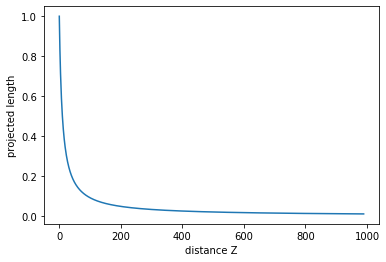

In [26]:
plotLengthChanges(-5, 5)

The exponential drop in size relative to distance from the camera is why we see two paralell lines converging when looking at an image of a straight road, for example

## [Generalizing 2D projection](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-05-perspective2Dgeneralized.mp4)
We've learned about how to generalize the above 2D perspective projection by resolving the three different coordinate systems we're dealing with:

1) World Coordinate System $\begin{pmatrix}X_w \\ Z_w \end{pmatrix}$ - where things are located in the real world (cm)

2) Camera Coordinate System $\begin{pmatrix}X_c \\ Z_c \end{pmatrix}$ - where things are located inside the camera (cm)

3) Sensor Coordinate System $\begin{pmatrix}X_s \\ s \end{pmatrix}$ - where object projections are located in the camera sensor (pixels)

### Specifying a point in the world in the camera coordinate system
This means that we need to resolve the location of an object from the world coordinate system to the camera coordinate system in order to avoid having things change based on where the camera is located. 

We can do this with an in-plane rotation and origin translation from the point in the world. 


$ \begin{pmatrix}
    X_c \\
    Z_c
\end{pmatrix} = \begin{pmatrix}
    \cos(\theta) & -\sin(\theta) & t_x \\
    \sin(\theta) & \cos(\theta) & t_z
\end{pmatrix} \begin{pmatrix}
    X_w \\
    Z_w \\
    1
\end{pmatrix}$

(the extra "1" at the bottom of the last matrix is just using [homeogenius coordinates](https://en.wikipedia.org/wiki/Homogeneous_coordinates) to avoid lugging around the translation as a separate operation)

### Finding the projected object location in Sensor Coordinate system
Now that we have our camera coordinates above (as defined by real world coordinate system) we can resolve object locations into the sensor coordinate system to find the projected location

We can do this by multiplying the camera coordinates with a matrix containing two extra terms:

$ f $ - focal length

$ c_x $ - how much the sensor is offset from the optical axis

$ \begin{pmatrix}
    x_s \\
    s
\end{pmatrix} = \begin{pmatrix}
    f & c_x \\
    0 & 1
\end{pmatrix} \begin{pmatrix}
    X_c \\
    Z_c
\end{pmatrix}$

Multiplying that out we get the following coordinates in the camera coordinate system that will map to the object's location in the sensor coordinate system  $x = x_s/s = (fX_c + c_xZ_c) / Z_c$

### Putting it all together

The last thing we need to do is convert the units from real-world measurments (cm) in the camera coordinate system to pixels in the sensor coordinate system. We do this by adding a $ \Lambda $ term which represents the density of pixels in the sensor... so the final equation, putting all of the above together is:

$ \begin{pmatrix}
    x_s \\
    s
\end{pmatrix} = \Lambda \begin{pmatrix}
    f & c_x \\
    0 & 1
\end{pmatrix} \begin{pmatrix}
    \cos(\theta) & -\sin(\theta) & t_x \\
    \sin(\theta) & \cos(\theta) & t_z
\end{pmatrix} \begin{pmatrix}
    X_w \\
    Z_w \\
    1
\end{pmatrix}$

The **first matrix**, $\begin{pmatrix}
    f & c_x \\
    0 & 1
\end{pmatrix}$, can be thought of an an **_intrinsic_ matrix**, translating the camera system to the sensor system and is typically represented as $K$

The **second matrix**, $\begin{pmatrix}
    \cos(\theta) & -\sin(\theta) & t_x \\
    \sin(\theta) & \cos(\theta) & t_z
\end{pmatrix}$, can be thought of an an **_extrinsic_ matrix**, translating the camera system to the sensor system and is typically represented as $M$

In that way, we can simply refer to the above equation as:
$ \vec p = \Lambda K M \vec P$

### Loss of information
We talked above about loss of information in the perspective projection and see it again algebraically here because a 2 x 3 matrix operation is not invertible

## [3D Perspective Projection](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-06-perspective3D.mp4)

Now instead of projecting from a 2D world to 1D sensor as above, we need to project from a 3D world to a 2D sensor.

So we will be starting with a 3 dimensional world-coordinate and resolving to a 3 dimensional camera coordinate in much the same was as we did above - a rotation + origin translation! The difference is that we're no longer doing an in-plane rotation but are going to have to be able to rotate along the X, Y and Z axis.

### Exercise #2 - 3D to 2D projection
> Write some code that simulates the projection of a 3-D cube under the perspective projection. The eight corners of the cube are:
```
[0,0,0],[1,0,0],[1,1,0],[0,1,0],[0,0,1],[1,0,1],[1,1,1],[0,1,1]
```

> Specify the translation and rotation around the x-, y-, and z- axis and build the 3x4 extrinsic matrix $M$.

> Specify the focal length and camera center, and build the 3x3 intrinsic matrix $K$.

> Project under perspective projection using the projection matrix formulation: 

> $ \begin{pmatrix}
    x_s \\
    y_s \\
    s
\end{pmatrix} = \Lambda \begin{pmatrix}
    f & 0 & c_x \\
    0 & f & c_y \\
    0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
    r_{11} & r_{21} & r_{31} & t_x \\
    r_{12} & r_{22} & r_{32} & t_y \\
    r_{13} & r_{23} & r_{33} & t_z
\end{pmatrix} \begin{pmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
\end{pmatrix}$

> Draw the resulting "image" of the cube: $ \vec p = \Lambda K M \vec P$

Some helpful notes from Hany:

1) Assume $c_x$ and $c_y$ are 0 for now to simplify things

2) Assume $t_x$ and $t_y$ are also 0 and just play with the movement of Z

3) The 3x3 rotation in our extrinsic matrix can be defined as below - I will need to define all our theta values:
> $ R = \begin{pmatrix}
    1 & 0 & 0 \\
    0 & \cos(\theta_x) & -\sin(\theta_x) \\
    0 & \sin(\theta_x) & \cos(\theta_x)
\end{pmatrix} \begin{pmatrix}
    \cos(\theta_y) & 0 & \sin(\theta_y) \\
    0 & 1 & 0 \\
    -\sin(\theta_y) & 0 & \cos(\theta_y)
\end{pmatrix} \begin{pmatrix}
    \cos(\theta_z) & -\sin(\theta_z) & 0 \\
    \sin(\theta_z) & \cos(\theta_z) & 0 \\
    0 & 0 & 1
\end{pmatrix}$

(-0.005, 0.02, -0.01, 0.012)

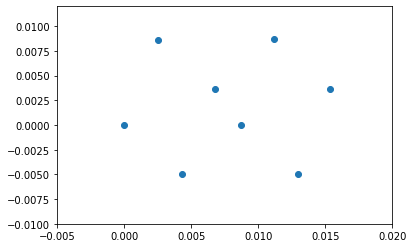

In [79]:
cube = np.array([[0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],[0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]])

f = 1
tx = 0
ty = 0
tz = 100

Rx = np.radians(30)
Ry = np.radians(30)
Rz = np.radians(0)

# Define the basic rotation matrix for each axis
RMx = np.array([[1,0,0], [0, cos(Rx), -sin(Rx)], [0, sin(Rx), cos(Rx)]])
RMy = np.array([[cos(Ry),0, sin(Ry)],[0,1,0], [-sin(Ry), 0, cos(Ry)]])
RMz = np.array([[cos(Rz), -sin(Rz), 0], [sin(Rz), cos(Rz), 0], [0,0,1]])
M = RMz @ RMy @ RMx

# Add the origin translation terms to complete extrinsic matrix
M = np.append(M, [[tx], [ty], [tz]], axis=1)
    
# Define intrinsic matrix
K = np.array([[f,0,0],[0,f,0],[0,0,1]])

x = []
y = []
for point in cube:
    r = K @ (np.dot(M, point))
    x.append(r[0]/r[2])
    y.append(r[1]/r[2])
    
plt.scatter(x, y)
plt.axis((-0.005,0.02,-0.01, 0.012))

## [Fixels Color Filter Array](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-10-colorFilterArray.mp4)

### Exercise #3 - Generate full RGB image in matplotlib

> Write some code that generates a 256 x 256 image. In this image, the value of each pixel in the i^th image row of the red channel is `i*0.0039`, the value of each pixel in the i^th image row of the green channel is `1-i*0.0039`, and every pixel in the blue channel is `1`. Here, we will encode pixel values in the range [0,1] and display the image using `matplotlib.pyplot.imshow`

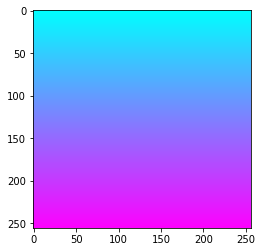

In [122]:
r = np.empty((256,256), dtype=float)
g = np.empty((256,256), dtype=float)
b = np.empty((256,256), dtype=float)

for i in range(0,256):
    r[i] = np.full(256, i*0.0039)
    g[i] = np.full(256, 1-i*0.0039)
    b[i] = np.full(256, 1)
    
rgbArray = np.zeros((256,256,3), dtype=np.float32)
rgbArray[..., 0] = r
rgbArray[..., 1] = g
rgbArray[..., 2] = b

im = plt.imshow(
    rgbArray
);